In [4]:
import ndlib
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
import json
import warnings
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.OpinionEvolution import OpinionEvolution

### Modifiche apportate alla libreria ndlib:

#### Modifiche ai colori 

file <tt>DiffusionVix.py </tt>
- <tt>11: import seaborn as sns
- <tt>59: # Create an array with the colors you want to use </tt> 
- <tt>60: colors = ["#3b4cc0", "#b40426"]</tt>
- <tt>61: # Set your custom color palette</tt>
- <tt>62: cols = sns.set_palette(sns.color_palette(colors))</tt>
- <tt>72/76: plt.plot(..., color = cols) # , alpha=0.5) # , color=cols[i])
- <tt>83: plt.xlabel("Iterations", fontsize=14)
- <tt>84: plt.ylabel(self.ylabel, fontsize=14)
- <tt>85: plt.legend(loc="best", fontsize=12)
    
file <tt>Opinion Evolution.py </tt>
- <tt>64. if v < lim_inf:
    node2col[n] = '#4458DA'
  elif lim_inf <= v <= lim_sup:
    node2col[n] = '#91EDB6'
  else:
    node2col[n] = '#DA042F'</tt>
- <tt>80: plt.xlabel("Iterations", fontsize=14)
- <tt>81: plt.ylabel(self.ylabel, fontsize=14)
- <tt>82: plt.legend(loc="best", fontsize=12)


#### Modifiche al codice per opinioni reali

file <tt>AlgorithmicBiasModel.py </tt>
- <tt>54: def set_initial_status(self, graph, configuration=None):</tt>
- <tt>63: #self.status[node] = np.random.random_sample()</tt>
- <tt>64: self.status[node] = graph.nodes[node]['classification']/3</tt>
- <tt>69: #if s > 1 or s < 0:</tt>
- <tt>70: if s > 1 or s < -1:</tt>
  
file <tt>OpinionEvolution.py </tt>
- <tt>64: if v < -.33:
    node2col[n] = '#4458DA'
  elif -.33 <= v <= .33:
    node2col[n] = '#91EDB6'
  else:
    node2col[n] = '#DA042F'</tt>
    

In [5]:
%run Utilyties.ipynb
%matplotlib inline

In [6]:
data = read_data('../data/final/data_complete.json')

G = init_network(data)

Alcune informazioni iniziali sui dati sono:
* TOT Retweet =  29863
* TOT Quote =  1187
* TOT Mentions =  57896
* TOT Reply =  3000




In [7]:
network_node_edge(G, 'G')

La rete G ha:

* Numero di nodi =  16675
* Numero di Edge =  52373


In [8]:
G0 = giant_component(G)

In [9]:
network_node_edge(G0, 'Giant component')

La rete Giant component ha:

* Numero di nodi =  16074
* Numero di Edge =  51932


Calcolo la frazione di infezione <b>reale</b>

In [11]:
counter = 0
for node in G0.nodes:
    if G.nodes[node]['classification']>0: 
        counter += 1
        
real = round(counter/G0.number_of_nodes(), 2)
        
print(f"Probabilità di infezione: {real}")

Probabilità di infezione: 0.34


Creo il <b>Complete Graph H</b> da 3000 nodi casuali della G0

In [13]:
import random as rd 

rd.seed(42)

sample = rd.sample(G0.nodes, 3000)
H = nx.complete_graph(sample)

#associo ad ogni nodo del Complete Graph la propria classificazione 
labels = nx.get_node_attributes(G0, 'classification') 
nx.set_node_attributes(H, labels, 'classification')

# Voter

## Complete Graph

Fraction infected: 
- 0,25 
- 0,5 
- 0,75 
- reale (0,37)

### Fraction infected = 0.25

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1004.53it/s]


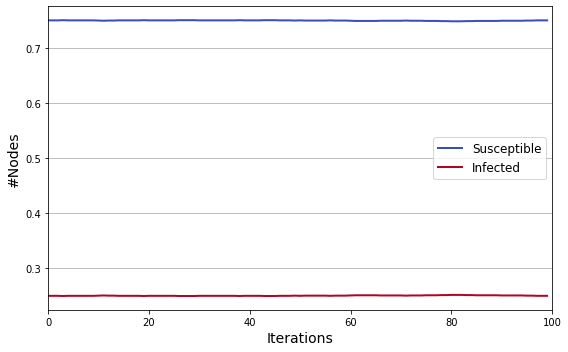

In [14]:
model = op.VoterModel(H)
config = mc.Configuration()

config.add_model_parameter('fraction_infected', 0.25)
model.set_initial_status(config)

iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

### Fraction infected = 0.5  

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 980.82it/s]


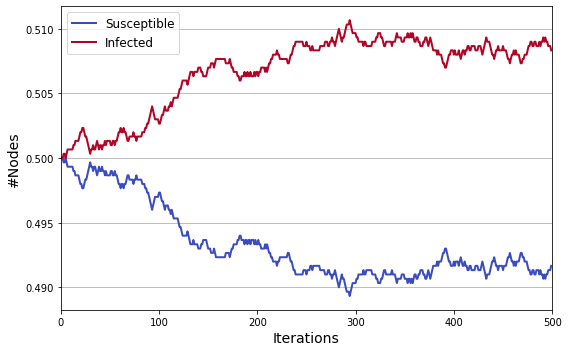

In [15]:
model = op.VoterModel(H)
config = mc.Configuration()

config.add_model_parameter('fraction_infected', 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(500)
trends = model.build_trends(iterations)


plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

### Fraction infected = 0.75  

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1062.30it/s]


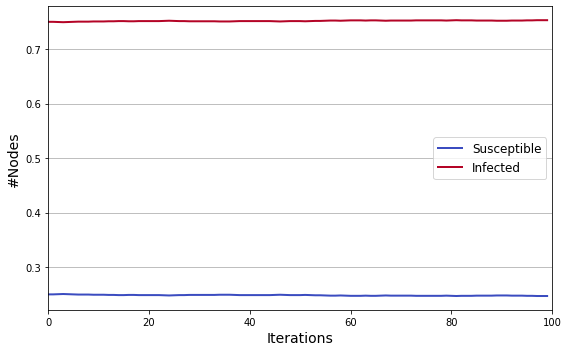

In [16]:
model = op.VoterModel(H)
config = mc.Configuration()

config.add_model_parameter('fraction_infected', 0.75)
model.set_initial_status(config)

iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

### Real fraction infected  

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 854.96it/s]


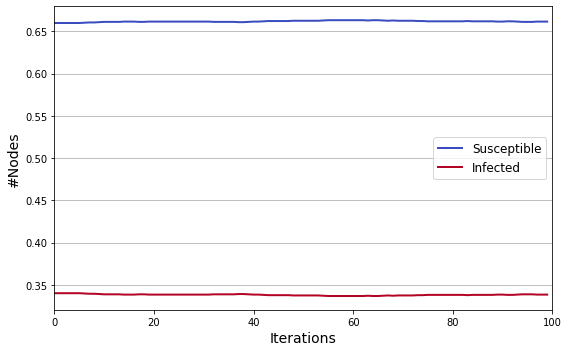

In [17]:
model = op.VoterModel(H)
config = mc.Configuration()

config.add_model_parameter('fraction_infected', real)
model.set_initial_status(config)

iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

## Crawled Data

Fraction infected: 
- 0,25 
- 0,5 
- 0,75 
- reale (0,37)

### Fraction infected = 0.25  

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 30.44it/s]


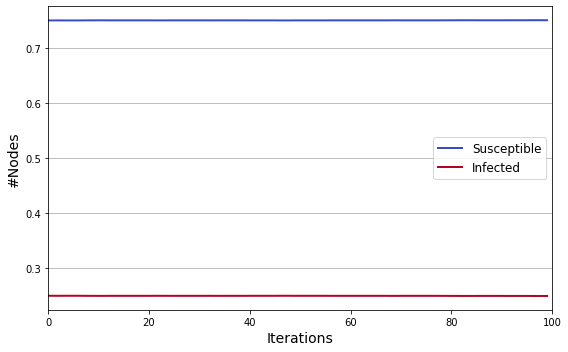

In [12]:
model = op.VoterModel(G0)
config = mc.Configuration()

config.add_model_parameter('fraction_infected', 0.25)
model.set_initial_status(config)

iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

### Fraction infected = 0.5  

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:17<00:00, 28.78it/s]


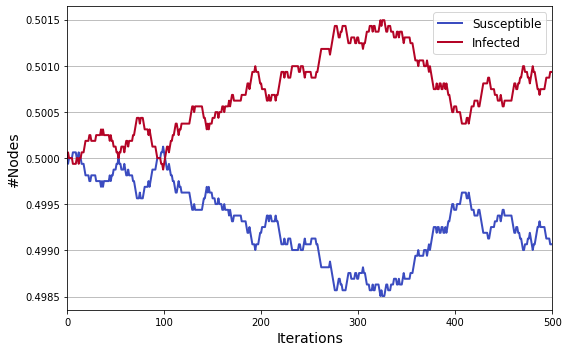

In [13]:
model = op.VoterModel(G0)
config = mc.Configuration()

config.add_model_parameter('fraction_infected', 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(500)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

### Fraction infected = 0.75  

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 25.54it/s]


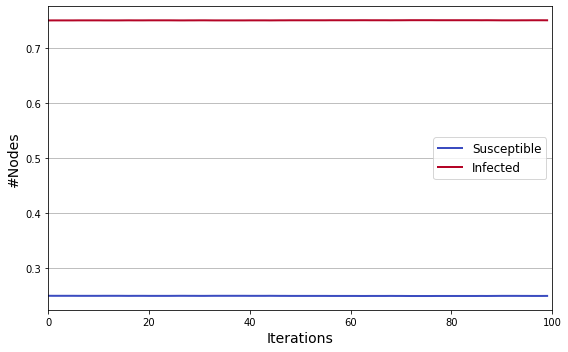

In [14]:
model = op.VoterModel(G0)
config = mc.Configuration()

config.add_model_parameter('fraction_infected', 0.75)
model.set_initial_status(config)

iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

### Real fraction infected  

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 25.17it/s]


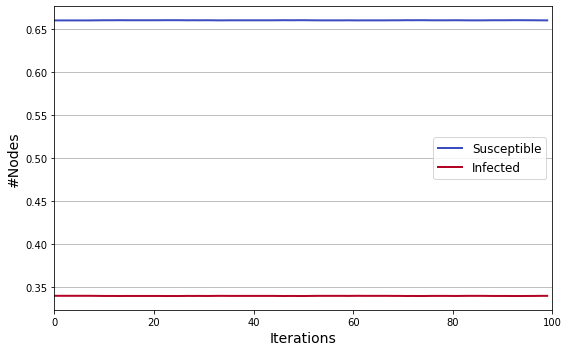

In [15]:
model = op.VoterModel(G0)
config = mc.Configuration()

config.add_model_parameter('fraction_infected', real)
model.set_initial_status(config)

iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

# Snayzd Model

## Complete Graph

Fraction infected: 
- 0,25 
- 0,5 
- 0,75 
- reale (0,37)

### Fraction infected = 0.25

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 381.49it/s]


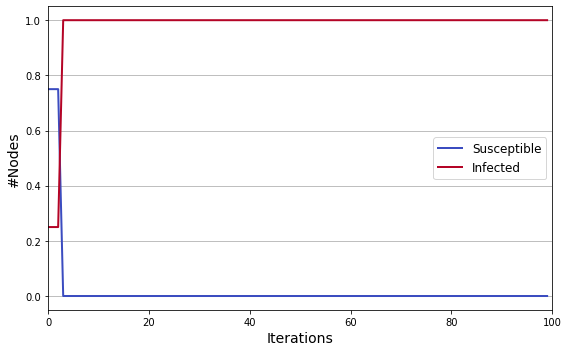

In [18]:
model = op.SznajdModel(H)
config = mc.Configuration()

config.add_model_parameter('fraction_infected', 0.25)
model.set_initial_status(config)

iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

### Fraction infected = 0.5  

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 361.61it/s]


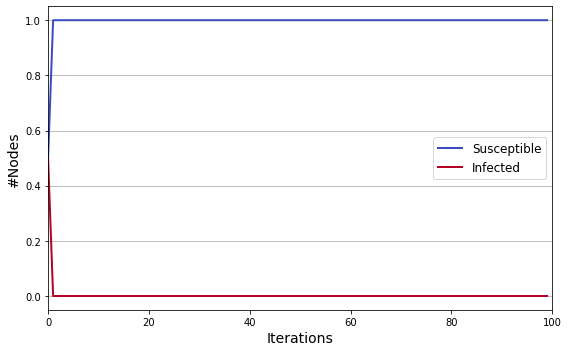

In [19]:
model = op.SznajdModel(H)
config = mc.Configuration()

config.add_model_parameter('fraction_infected', 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)


plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

### Fraction infected = 0.75  

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 428.36it/s]


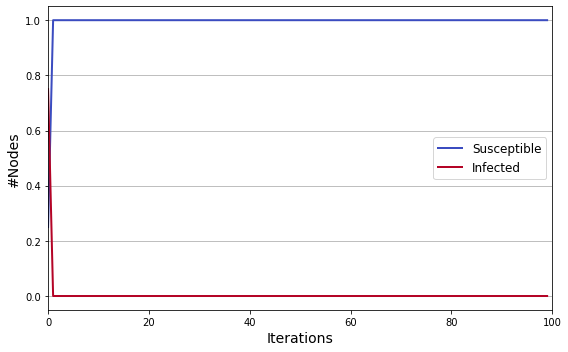

In [20]:
model = op.SznajdModel(H)
config = mc.Configuration()

config.add_model_parameter('fraction_infected', 0.75)
model.set_initial_status(config)

iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

### Real fraction infected  

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 400.18it/s]


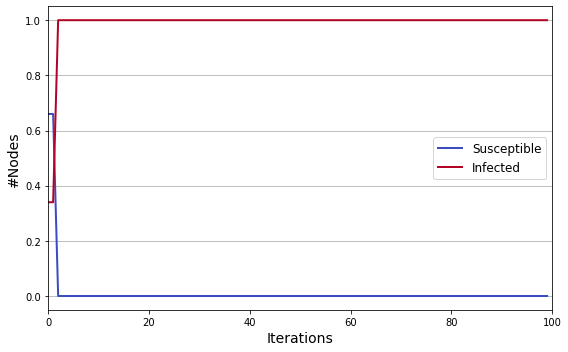

In [21]:
model = op.SznajdModel(H)
config = mc.Configuration()

config.add_model_parameter('fraction_infected', real)
model.set_initial_status(config)

iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

## Crawled Data

Fraction infected: 
- 0,25 
- 0,5 
- 0,75 
- reale (0,37)

### Fraction infected = 0.25  

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 29.05it/s]


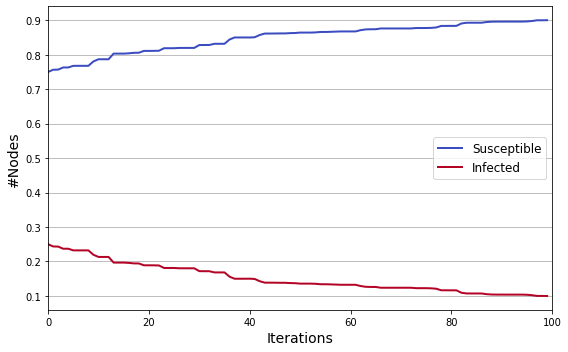

In [20]:
model = op.SznajdModel(G0)
config = mc.Configuration()

config.add_model_parameter('fraction_infected', 0.25)
model.set_initial_status(config)

iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

### Fraction infected = 0.5  

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:13<00:00, 37.28it/s]


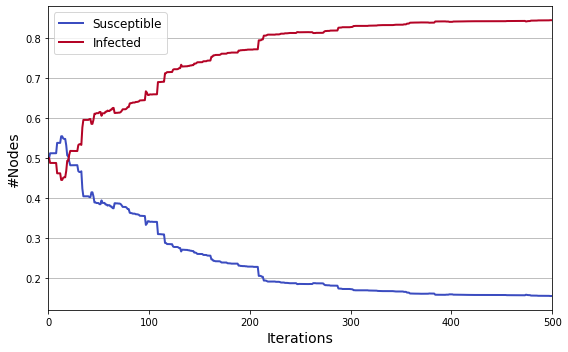

In [25]:
model = op.SznajdModel(G0)
config = mc.Configuration()

config.add_model_parameter('fraction_infected', 0.5)
model.set_initial_status(config)

iterations = model.iteration_bunch(500)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

### Fraction infected = 0.75  

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 32.88it/s]


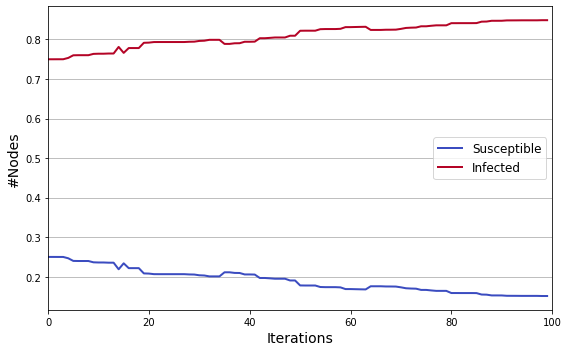

In [22]:
model = op.SznajdModel(G0)
config = mc.Configuration()

config.add_model_parameter('fraction_infected', 0.75)
model.set_initial_status(config)

iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

### Real fraction infected  

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 31.37it/s]


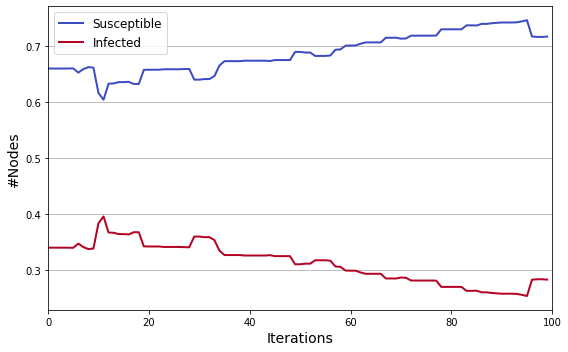

In [23]:
model = op.SznajdModel(G0)
config = mc.Configuration()

config.add_model_parameter('fraction_infected', real)
model.set_initial_status(config)

iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

# Majority Rule Model 

## Complete Graph

Fraction infected: 
- 0,25 con 10, 50 e 100 vicini
- 0,5 con 10, 50 e 100 vicini
- 0,75 con 10, 50 e 100 vicini
- reale (0,37) con 10, 50 e 100 vicini


### Fraction infected = 0.25

#### Number of neighbours = 10

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 872.05it/s]


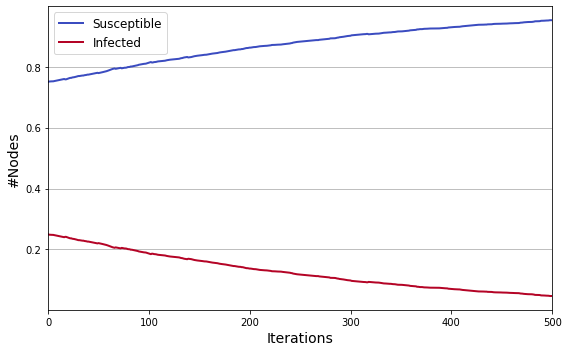

In [22]:
model = op.MajorityRuleModel(H)
config = mc.Configuration()
config.add_model_parameter('q', 10)
config.add_model_parameter('fraction_infected', 0.25)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(500)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 50

100%|███████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 442.93it/s]


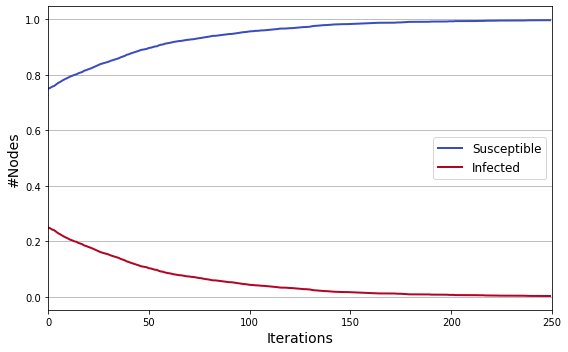

In [23]:
model = op.MajorityRuleModel(H)
config = mc.Configuration()
config.add_model_parameter('q', 50)
config.add_model_parameter('fraction_infected', 0.25)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(250)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 100

100%|███████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 278.40it/s]


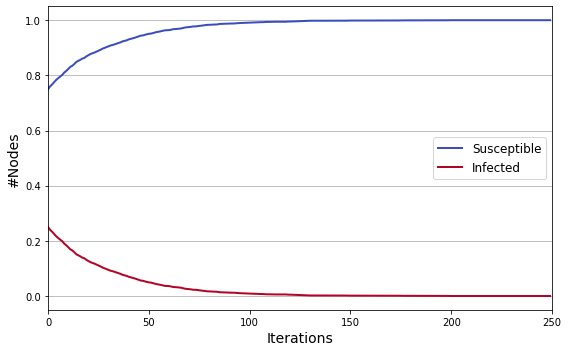

In [24]:
model = op.MajorityRuleModel(H)
config = mc.Configuration()
config.add_model_parameter('q', 100)
config.add_model_parameter('fraction_infected', 0.25)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(250)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

### Fraction infected = 0.5  

#### Number of neighbours = 10

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 884.43it/s]


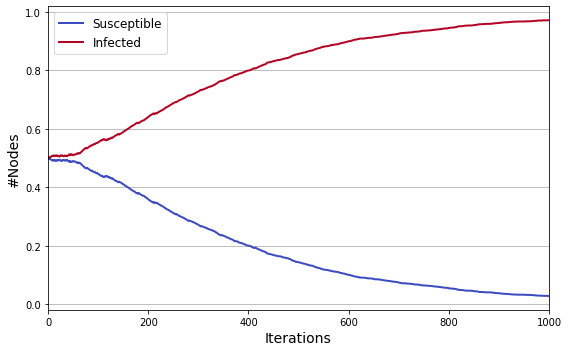

In [25]:
model = op.MajorityRuleModel(H)
config = mc.Configuration()
config.add_model_parameter('q', 10)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(1000)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 50

100%|███████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 420.09it/s]


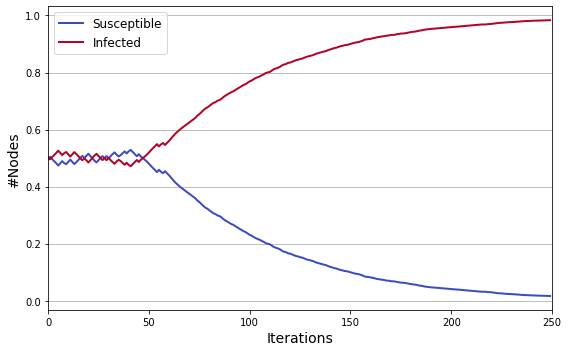

In [26]:
model = op.MajorityRuleModel(H)
config = mc.Configuration()
config.add_model_parameter('q', 50)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(250)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 100

100%|███████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 277.00it/s]


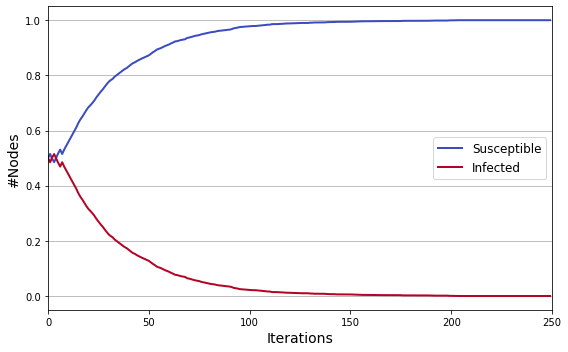

In [27]:
model = op.MajorityRuleModel(H)
config = mc.Configuration()
config.add_model_parameter('q', 100)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(250)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

### Fraction infected = 0.75  

#### Number of neighbours = 10

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 924.89it/s]


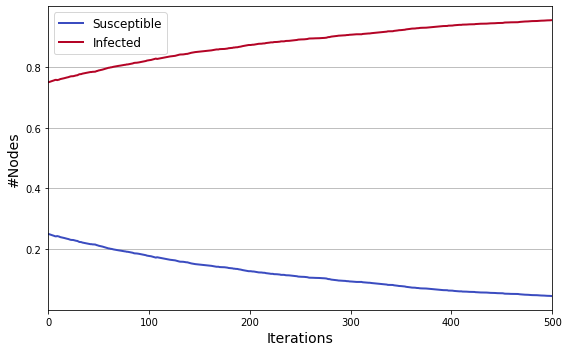

In [28]:
model = op.MajorityRuleModel(H)
config = mc.Configuration()
config.add_model_parameter('q', 10)
config.add_model_parameter('fraction_infected', 0.75)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(500)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 50

100%|███████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 484.40it/s]


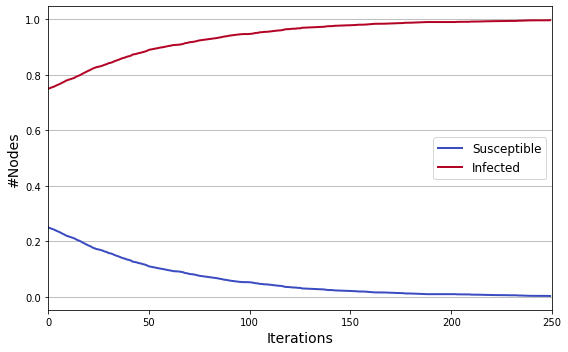

In [29]:
model = op.MajorityRuleModel(H)
config = mc.Configuration()
config.add_model_parameter('q', 50)
config.add_model_parameter('fraction_infected', 0.75)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(250)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 100

100%|███████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 278.06it/s]


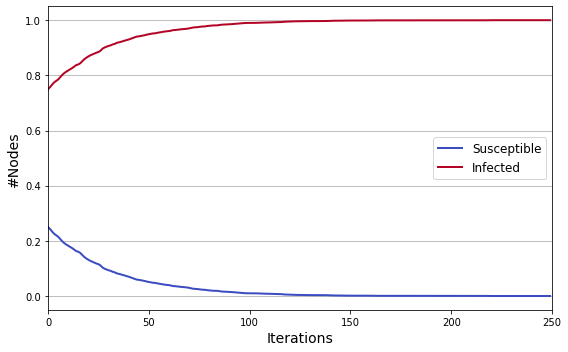

In [30]:
model = op.MajorityRuleModel(H)
config = mc.Configuration()
config.add_model_parameter('q', 100)
config.add_model_parameter('fraction_infected', 0.75)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(250)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

### Real fraction infected  

#### Number of neighbours = 10

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 871.97it/s]


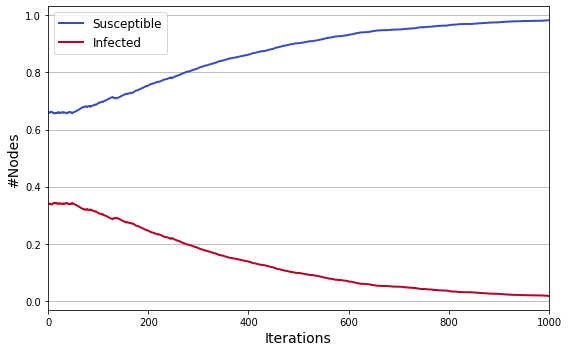

In [31]:
model = op.MajorityRuleModel(H)
config = mc.Configuration()
config.add_model_parameter('q', 10)
config.add_model_parameter('fraction_infected', real)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(1000)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 50

100%|███████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 308.51it/s]


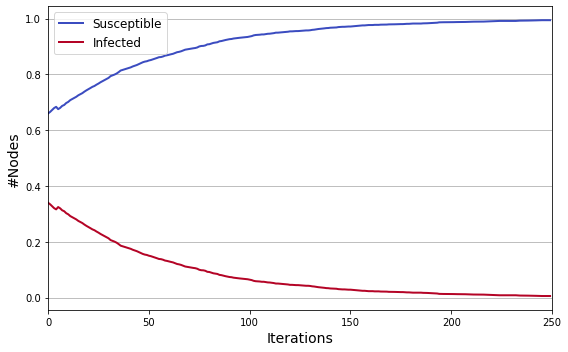

In [32]:
model = op.MajorityRuleModel(H)
config = mc.Configuration()
config.add_model_parameter('q', 50)
config.add_model_parameter('fraction_infected', real)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(250)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 100

100%|███████████████████████████████████████████████████████████████████████████████| 250/250 [00:01<00:00, 243.45it/s]


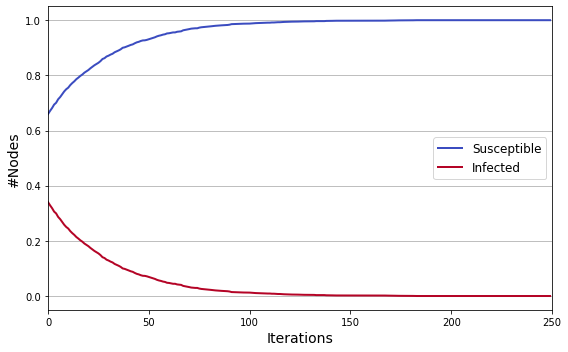

In [33]:
model = op.MajorityRuleModel(H)
config = mc.Configuration()
config.add_model_parameter('q', 100)
config.add_model_parameter('fraction_infected', real)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(250)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

## Crawled Data

Fraction infected: 
- 0,25 con 10, 50 e 100 vicini
- 0,5 con 10, 50 e 100 vicini
- 0,75 con 10, 50 e 100 vicini
- reale (0,37) con 10, 50 e 100 vicini


### Fraction infected = 0.25

#### Number of neighbours = 10

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [01:30<00:00,  5.52it/s]


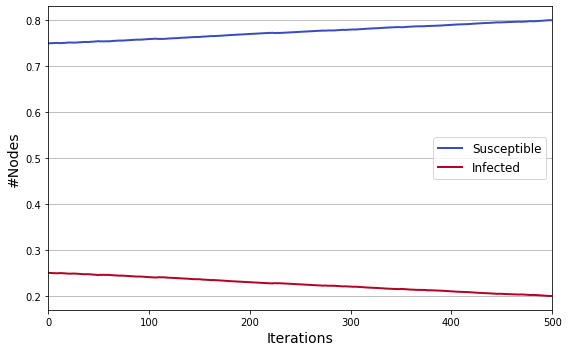

In [38]:
model = op.MajorityRuleModel(G0)
config = mc.Configuration()
config.add_model_parameter('q', 10)
config.add_model_parameter('fraction_infected', 0.25)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(500)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 50

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [07:14<00:00,  1.15it/s]


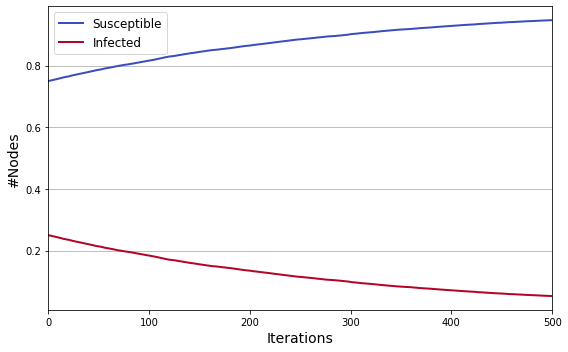

In [39]:
model = op.MajorityRuleModel(G0)
config = mc.Configuration()
config.add_model_parameter('q', 50)
config.add_model_parameter('fraction_infected', 0.25)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(500)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 100

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [14:18<00:00,  1.72s/it]


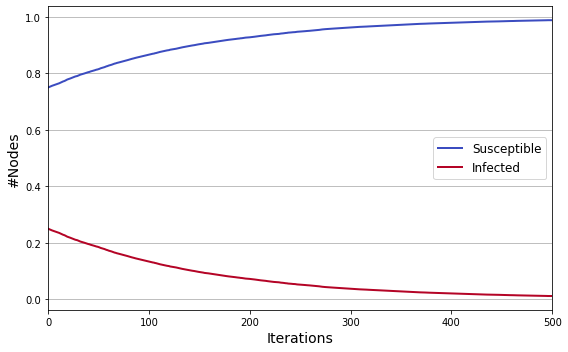

In [73]:
model = op.MajorityRuleModel(G0)
config = mc.Configuration()
config.add_model_parameter('q', 100)
config.add_model_parameter('fraction_infected', 0.25)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(500)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

### Fraction infected = 0.5  

#### Number of neighbours = 10

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:49<00:00,  5.89it/s]


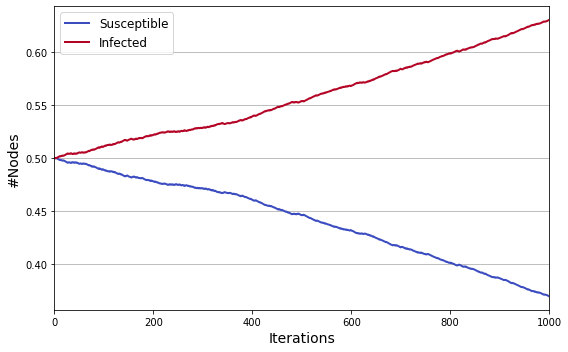

In [74]:
model = op.MajorityRuleModel(G0)
config = mc.Configuration()
config.add_model_parameter('q', 10)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(1000)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 50

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [06:25<00:00,  1.30it/s]


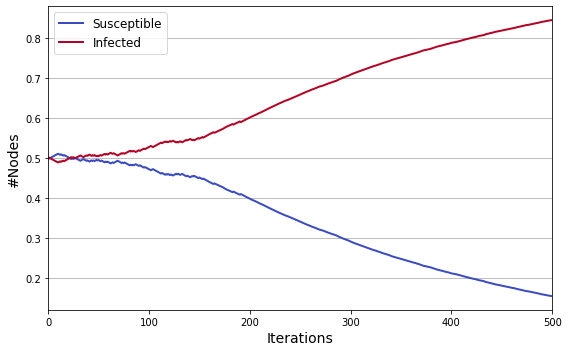

In [75]:
model = op.MajorityRuleModel(G0)
config = mc.Configuration()
config.add_model_parameter('q', 50)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(500)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 100

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [12:27<00:00,  1.49s/it]


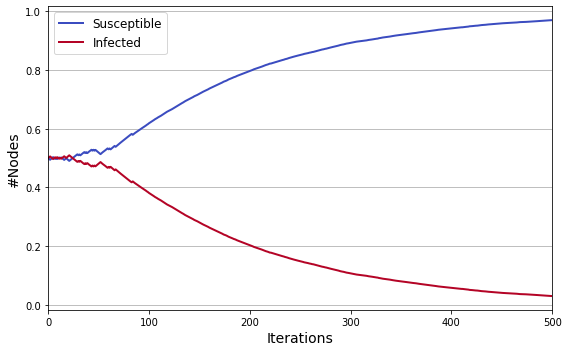

In [76]:
model = op.MajorityRuleModel(G0)
config = mc.Configuration()
config.add_model_parameter('q', 100)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(500)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

### Fraction infected = 0.75  

#### Number of neighbours = 10

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [01:23<00:00,  5.97it/s]


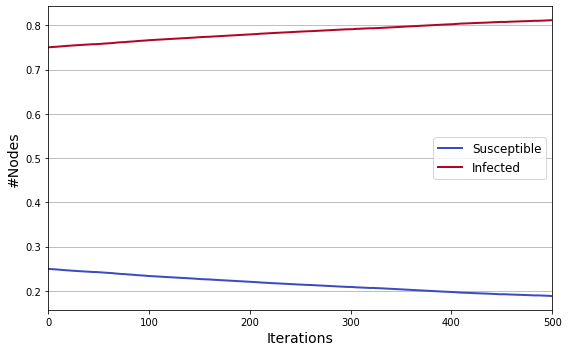

In [77]:
model = op.MajorityRuleModel(G0)
config = mc.Configuration()
config.add_model_parameter('q', 10)
config.add_model_parameter('fraction_infected', 0.75)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(500)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 50

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [06:17<00:00,  1.32it/s]


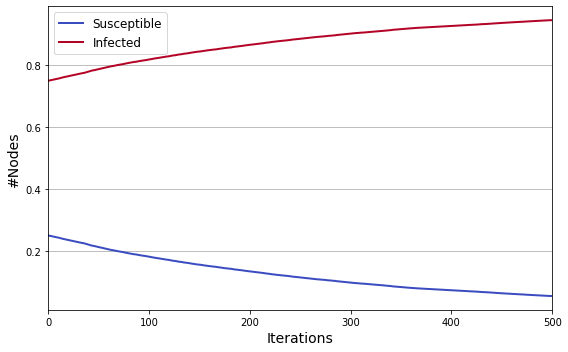

In [78]:
model = op.MajorityRuleModel(G0)
config = mc.Configuration()
config.add_model_parameter('q', 50)
config.add_model_parameter('fraction_infected', 0.75)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(500)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 100

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [12:27<00:00,  1.49s/it]


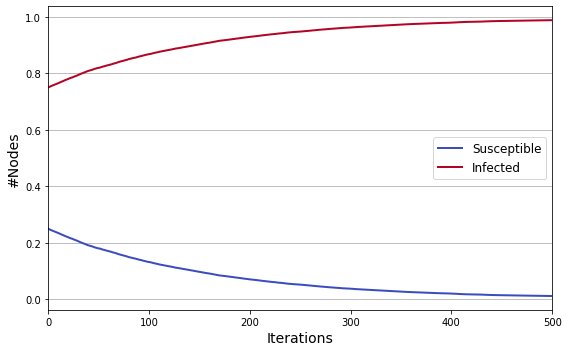

In [79]:
model = op.MajorityRuleModel(G0)
config = mc.Configuration()
config.add_model_parameter('q', 100)
config.add_model_parameter('fraction_infected', 0.75)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(500)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

### Real fraction infected  

#### Number of neighbours = 10

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [01:23<00:00,  5.96it/s]


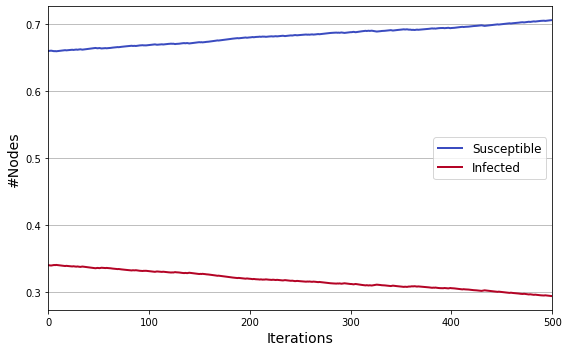

In [80]:
model = op.MajorityRuleModel(G0)
config = mc.Configuration()
config.add_model_parameter('q', 10)
config.add_model_parameter('fraction_infected', real)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(500)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 50

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [06:18<00:00,  1.32it/s]


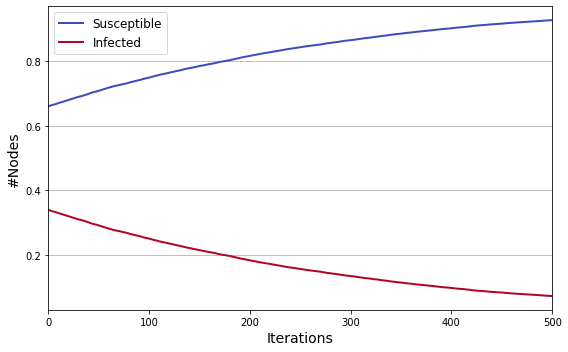

In [81]:
model = op.MajorityRuleModel(G0)
config = mc.Configuration()
config.add_model_parameter('q', 50)
config.add_model_parameter('fraction_infected', real)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(500)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 100

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [12:27<00:00,  1.49s/it]


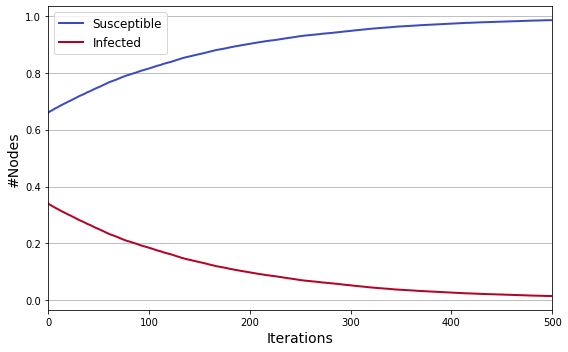

In [82]:
model = op.MajorityRuleModel(G0)
config = mc.Configuration()
config.add_model_parameter('q', 100)
config.add_model_parameter('fraction_infected', real)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(500)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

# QVoter Model

## Complete Graph

Fraction infected: 
- 0,25 con 10, 50 e 100 vicini
- 0,5 con 10, 50 e 100 vicini
- 0,75 con 10, 50 e 100 vicini
- reale (0,37) con 10, 50 e 100 vicini


### Fraction infected = 0.25

#### Number of neighbours = 10

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 883.07it/s]


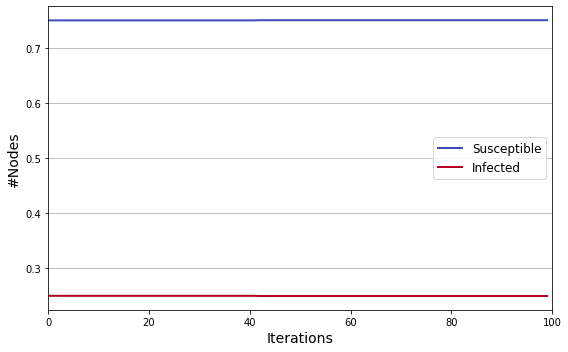

In [34]:
model = op.QVoterModel(H)
config = mc.Configuration()
config.add_model_parameter('q', 10)
config.add_model_parameter('fraction_infected', 0.25)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 50

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 720.73it/s]


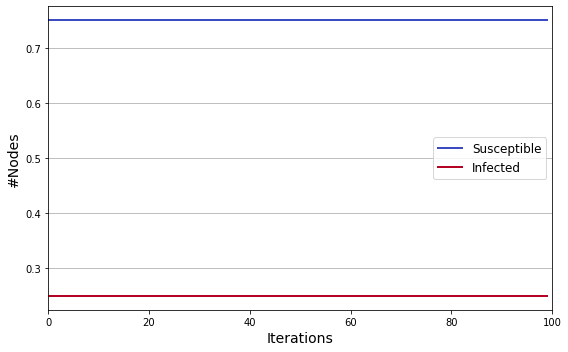

In [35]:
model = op.QVoterModel(H)
config = mc.Configuration()
config.add_model_parameter('q', 50)
config.add_model_parameter('fraction_infected', 0.25)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 100

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1134.68it/s]


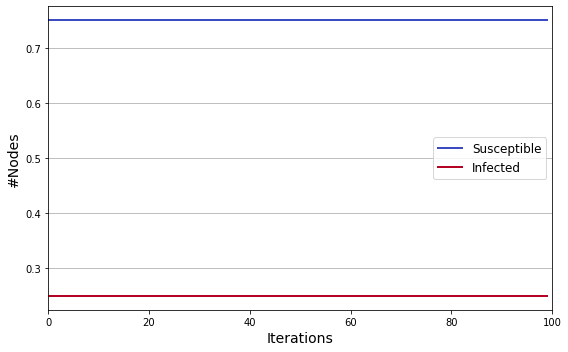

In [36]:
model = op.QVoterModel(H)
config = mc.Configuration()
config.add_model_parameter('q', 100)
config.add_model_parameter('fraction_infected', 0.25)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

### Fraction infected = 0.5  

#### Number of neighbours = 10

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 932.06it/s]


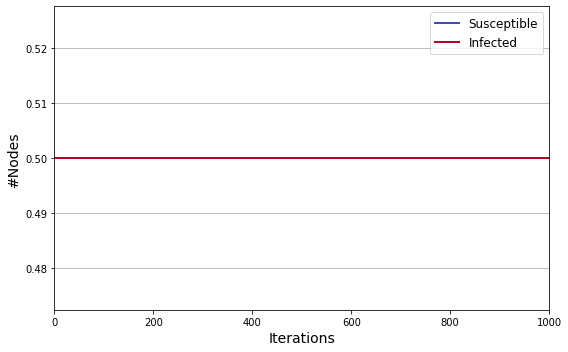

In [37]:
model = op.QVoterModel(H)
config = mc.Configuration()
config.add_model_parameter('q', 10)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(1000)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 50

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 897.59it/s]


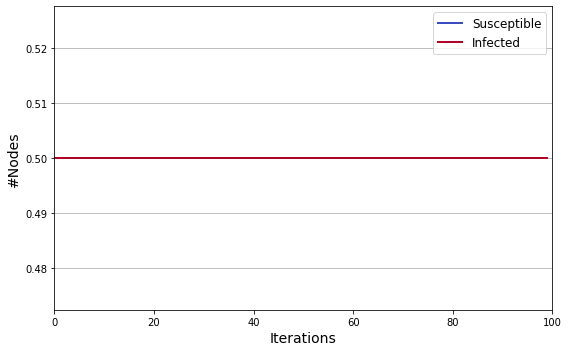

In [38]:
model = op.QVoterModel(H)
config = mc.Configuration()
config.add_model_parameter('q', 50)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 100

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1045.16it/s]


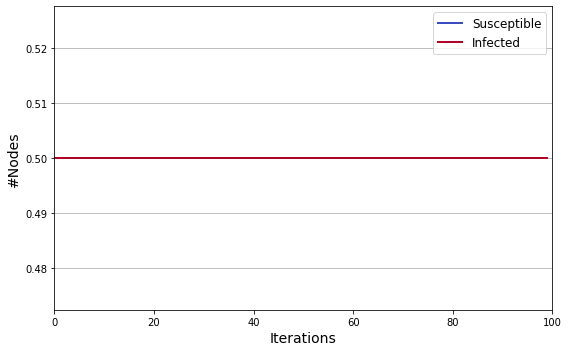

In [39]:
model = op.QVoterModel(H)
config = mc.Configuration()
config.add_model_parameter('q', 100)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

### Fraction infected = 0.75  

#### Number of neighbours = 10

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 916.25it/s]


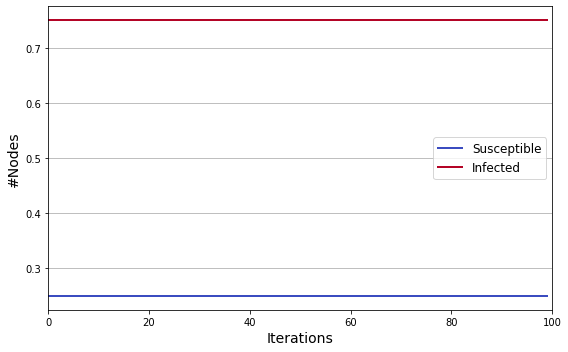

In [40]:
model = op.QVoterModel(H)
config = mc.Configuration()
config.add_model_parameter('q', 10)
config.add_model_parameter('fraction_infected', 0.75)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 50

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 795.90it/s]


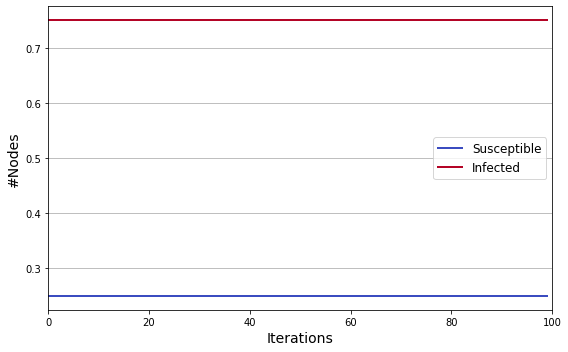

In [41]:
model = op.QVoterModel(H)
config = mc.Configuration()
config.add_model_parameter('q', 50)
config.add_model_parameter('fraction_infected', 0.75)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 100

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1104.13it/s]


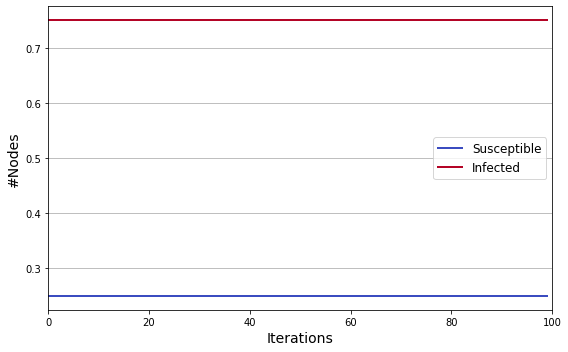

In [42]:
model = op.QVoterModel(H)
config = mc.Configuration()
config.add_model_parameter('q', 100)
config.add_model_parameter('fraction_infected', 0.75)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

### Real fraction infected  

#### Number of neighbours = 10

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1091.52it/s]


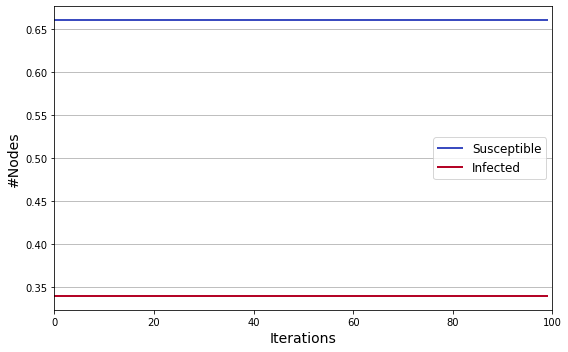

In [43]:
model = op.QVoterModel(H)
config = mc.Configuration()
config.add_model_parameter('q', 10)
config.add_model_parameter('fraction_infected', real)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 50

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 951.98it/s]


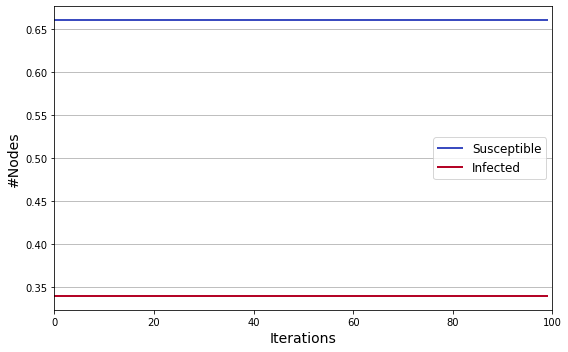

In [44]:
model = op.QVoterModel(H)
config = mc.Configuration()
config.add_model_parameter('q', 50)
config.add_model_parameter('fraction_infected', real)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 100

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1025.83it/s]


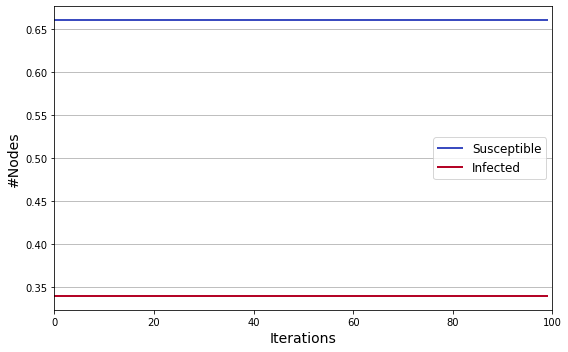

In [45]:
model = op.QVoterModel(H)
config = mc.Configuration()
config.add_model_parameter('q', 100)
config.add_model_parameter('fraction_infected', real)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

## Crawled Data

Fraction infected: 
- 0,25 con 10, 50 e 100 vicini
- 0,5 con 10, 50 e 100 vicini
- 0,75 con 10, 50 e 100 vicini
- reale (0,37) con 10, 50 e 100 vicini


### Fraction infected = 0.25

#### Number of neighbours = 10

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 35.19it/s]


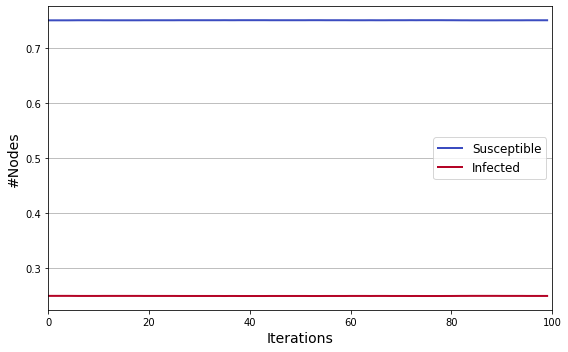

In [53]:
model = op.QVoterModel(G0)
config = mc.Configuration()
config.add_model_parameter('q', 10)
config.add_model_parameter('fraction_infected', 0.25)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 50

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 34.78it/s]


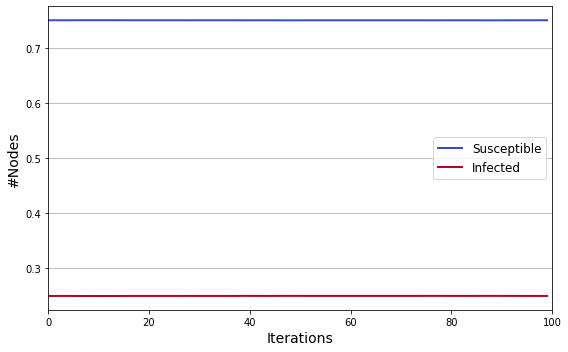

In [54]:
model = op.QVoterModel(G0)
config = mc.Configuration()
config.add_model_parameter('q', 50)
config.add_model_parameter('fraction_infected', 0.25)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 100

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:09<00:00,  1.89s/it]


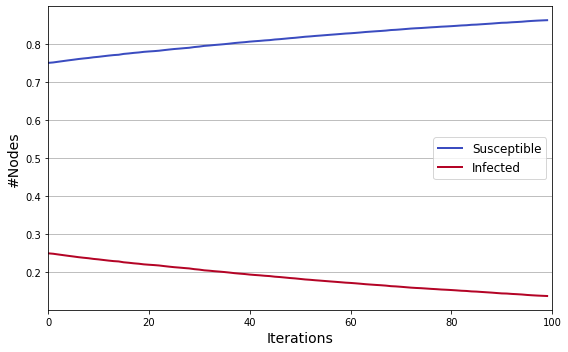

In [55]:
model = op.MajorityRuleModel(G0)
config = mc.Configuration()
config.add_model_parameter('q', 100)
config.add_model_parameter('fraction_infected', 0.25)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

### Fraction infected = 0.5  

#### Number of neighbours = 10

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:17<00:00, 27.85it/s]


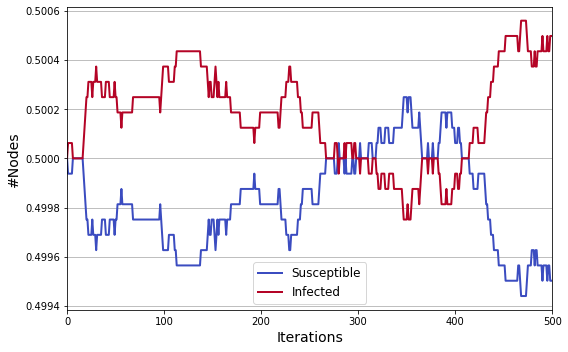

In [56]:
model = op.QVoterModel(G0)
config = mc.Configuration()
config.add_model_parameter('q', 10)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(500)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 50

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:14<00:00, 33.90it/s]


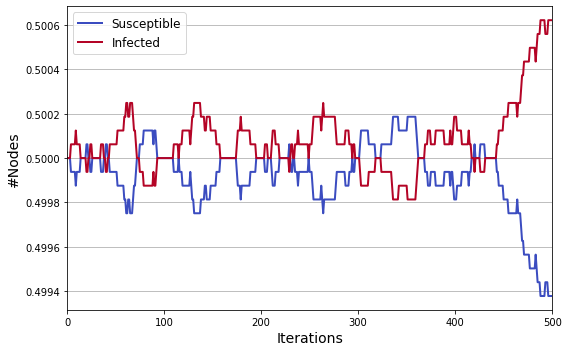

In [57]:
model = op.QVoterModel(G0)
config = mc.Configuration()
config.add_model_parameter('q', 50)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(500)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 100

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:16<00:00, 29.83it/s]


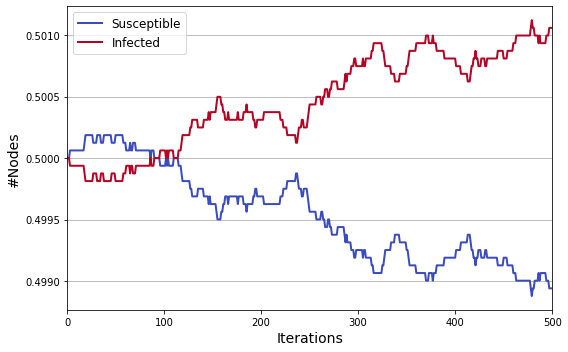

In [58]:
model = op.QVoterModel(G0)
config = mc.Configuration()
config.add_model_parameter('q', 100)
config.add_model_parameter('fraction_infected', 0.5)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(500)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

### Fraction infected = 0.75  

#### Number of neighbours = 10

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 34.51it/s]


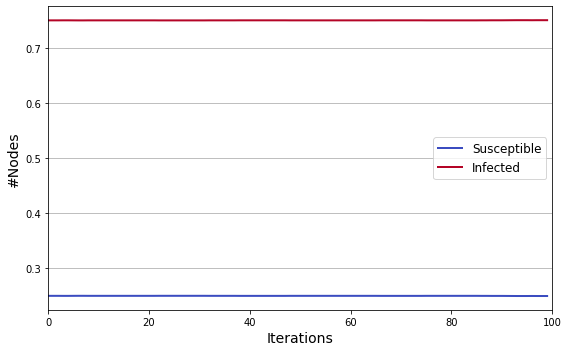

In [59]:
model = op.QVoterModel(G0)
config = mc.Configuration()
config.add_model_parameter('q', 10)
config.add_model_parameter('fraction_infected', 0.75)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 50

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 34.53it/s]


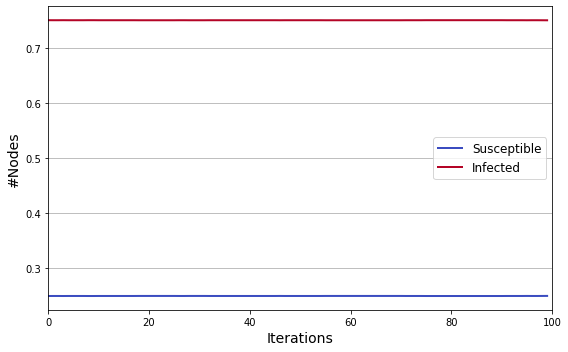

In [60]:
model = op.QVoterModel(G0)
config = mc.Configuration()
config.add_model_parameter('q', 50)
config.add_model_parameter('fraction_infected', 0.75)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 100

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 31.55it/s]


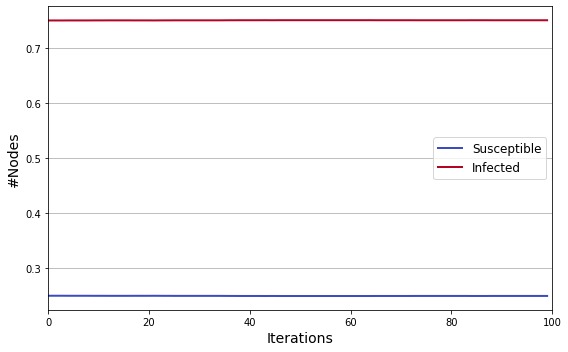

In [61]:
model = op.QVoterModel(G0)
config = mc.Configuration()
config.add_model_parameter('q', 100)
config.add_model_parameter('fraction_infected', 0.75)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

### Real fraction infected  

#### Number of neighbours = 10

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 32.95it/s]


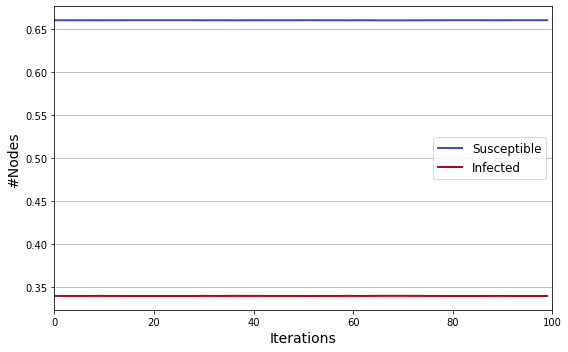

In [62]:
model = op.QVoterModel(G0)
config = mc.Configuration()
config.add_model_parameter('q', 10)
config.add_model_parameter('fraction_infected', real)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 50

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 37.51it/s]


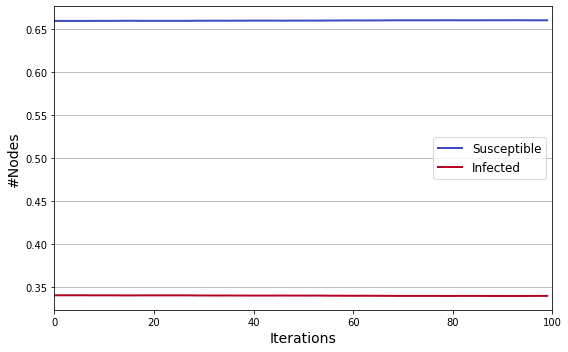

In [63]:
model = op.QVoterModel(G0)
config = mc.Configuration()
config.add_model_parameter('q', 50)
config.add_model_parameter('fraction_infected', real)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

#### Number of neighbours = 100

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 28.43it/s]


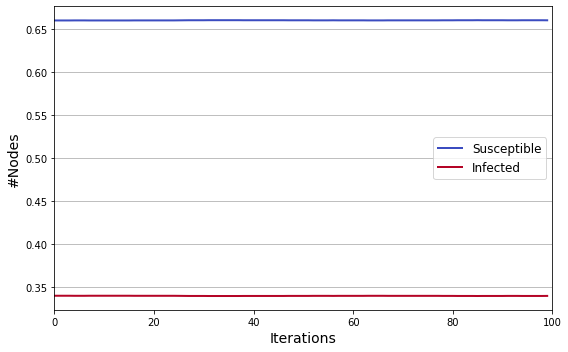

In [64]:
model = op.QVoterModel(G0)
config = mc.Configuration()
config.add_model_parameter('q', 100)
config.add_model_parameter('fraction_infected', real)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(100)
trends = model.build_trends(iterations)

plt.figure(figsize=(8,5))
viz = DiffusionTrend(model, trends)
viz.plot()

# Deffaunt Model 

## Prepocessing

In [46]:
#cambio il nome dei nodi per poterli passare a AlgorithmicBiasModel
mapping = dict(zip(G0, range(1, G0.number_of_nodes()+1)))
G0_l = nx.relabel_nodes(G0, mapping)

mapping = dict(zip(H, range(1, H.number_of_nodes()+1)))
H_l = nx.relabel_nodes(H, mapping)

## Crawled Data - Real Opinion

<b>With bias</b>:  
- Gamma 0,5 con epsilon 0.65 e 1.3
- Gamma 1 con epsilon 0.65 e 1.3
- Gamma 1,5 con epsilon 0.65 e 1.3
- Gamma 5 con epsilon 0.65 e 1.3

### Gamma = 0.5 

##### Epsilon = 0.65

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [36:37<00:00,  2.20s/it]
No handles with labels found to put in legend.


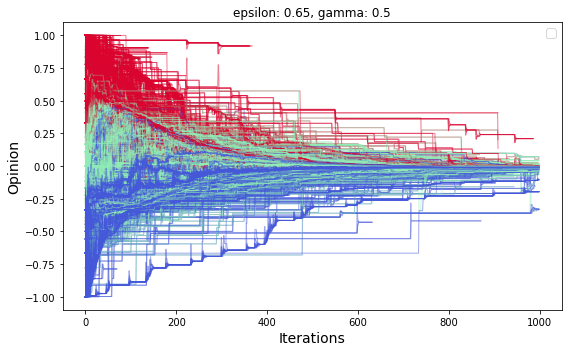

In [66]:
model = op.AlgorithmicBiasModel(G0_l)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.65)
config.add_model_parameter("gamma", 0.5)  
model.set_initial_status(G0_l, config)

# Simulation execution
iterations = model.iteration_bunch(1000)

plt.figure(figsize=(8,5))
viz = OpinionEvolution(model, iterations)
viz.plot()

#### Epsilon = 1.3

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [35:44<00:00,  2.14s/it]
No handles with labels found to put in legend.


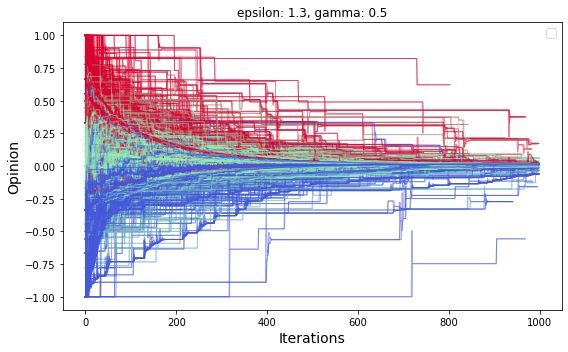

In [83]:
model = op.AlgorithmicBiasModel(G0_l)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 1.3)
config.add_model_parameter("gamma", 0.5)  
model.set_initial_status(G0_l, config)

# Simulation execution
iterations = model.iteration_bunch(1000)

plt.figure(figsize=(8,5))
viz = OpinionEvolution(model, iterations)
viz.plot()

### Gamma = 1

##### Epsilon = 0.65

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [34:39<00:00,  2.08s/it]
No handles with labels found to put in legend.


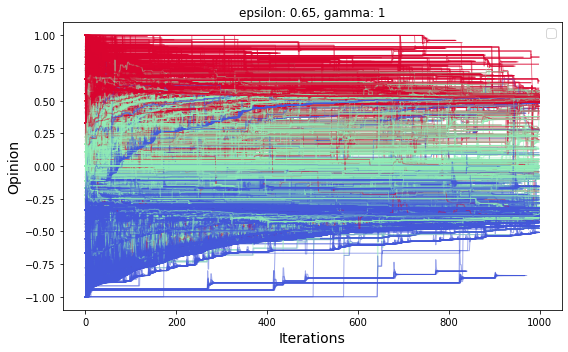

In [84]:
model = op.AlgorithmicBiasModel(G0_l)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.65)
config.add_model_parameter("gamma", 1)  
model.set_initial_status(G0_l, config)

# Simulation execution
iterations = model.iteration_bunch(1000)

plt.figure(figsize=(8,5))
viz = OpinionEvolution(model, iterations)
viz.plot()

#### Epsilon = 1.3

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [34:12<00:00,  2.05s/it]
No handles with labels found to put in legend.


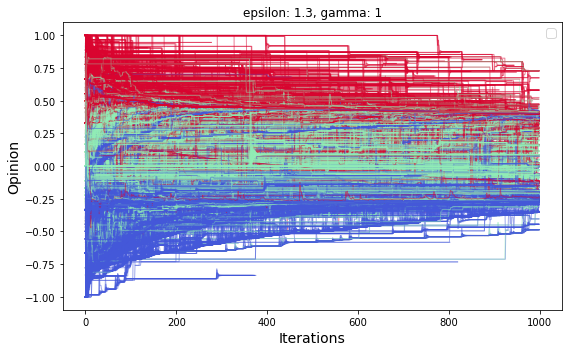

In [85]:
model = op.AlgorithmicBiasModel(G0_l)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 1.3)
config.add_model_parameter("gamma", 1)  
model.set_initial_status(G0_l, config)

# Simulation execution
iterations = model.iteration_bunch(1000)

plt.figure(figsize=(8,5))
viz = OpinionEvolution(model, iterations)
viz.plot()

### Gamma = 1.5 

##### Epsilon = 0.65

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [18:29<00:00,  2.22s/it]
No handles with labels found to put in legend.


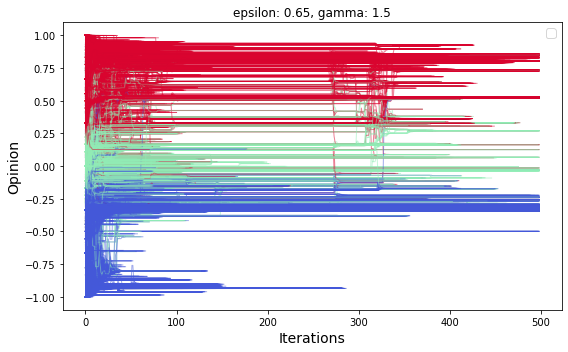

In [86]:
model = op.AlgorithmicBiasModel(G0_l)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.65)
config.add_model_parameter("gamma", 1.5)  
model.set_initial_status(G0_l, config)

# Simulation execution
iterations = model.iteration_bunch(500)

plt.figure(figsize=(8,5))
viz = OpinionEvolution(model, iterations)
viz.plot()

#### Epsilon = 1.3

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [18:36<00:00,  2.23s/it]
No handles with labels found to put in legend.


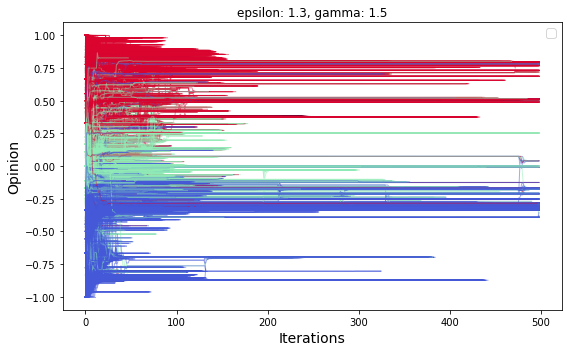

In [87]:
model = op.AlgorithmicBiasModel(G0_l)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 1.3)
config.add_model_parameter("gamma", 1.5)  
model.set_initial_status(G0_l, config)

# Simulation execution
iterations = model.iteration_bunch(500)

plt.figure(figsize=(8,5))
viz = OpinionEvolution(model, iterations)
viz.plot()

#provata fino a 1000 ma continua a essere frazionata

### Gamma = 5 

##### Epsilon = 0.65

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [17:49<00:00,  2.14s/it]
No handles with labels found to put in legend.


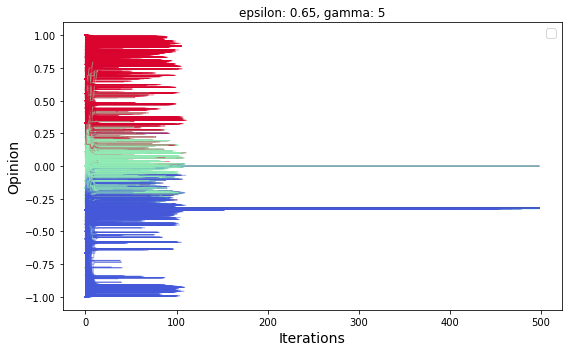

In [88]:
model = op.AlgorithmicBiasModel(G0_l)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.65)
config.add_model_parameter("gamma", 5)  
model.set_initial_status(G0_l, config)

# Simulation execution
iterations = model.iteration_bunch(500)

plt.figure(figsize=(8,5))
viz = OpinionEvolution(model, iterations)
viz.plot()

#### Epsilon = 1.3

100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [08:48<00:00,  2.12s/it]
No handles with labels found to put in legend.


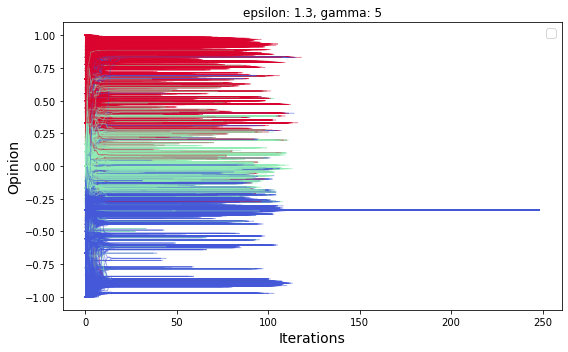

In [89]:
model = op.AlgorithmicBiasModel(G0_l)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 1.3)
config.add_model_parameter("gamma", 5)  
model.set_initial_status(G0_l, config)

# Simulation execution
iterations = model.iteration_bunch(250)

plt.figure(figsize=(8,5))
viz = OpinionEvolution(model, iterations)
viz.plot()

<b>W/O bias</b>:  
- con epsilon 0.65 e 1.3

### Gamma = 0

##### Epsilon = 0.65

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [18:36<00:00,  2.23s/it]
No handles with labels found to put in legend.


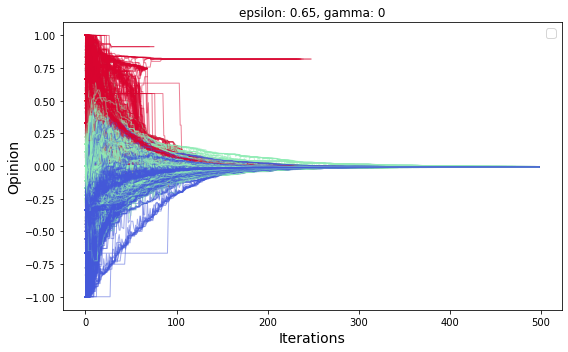

In [90]:
model = op.AlgorithmicBiasModel(G0_l)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.65)
config.add_model_parameter("gamma", 0)  
model.set_initial_status(G0_l, config)

# Simulation execution
iterations = model.iteration_bunch(500)

plt.figure(figsize=(8,5))
viz = OpinionEvolution(model, iterations)
viz.plot()

#### Epsilon = 1.3

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [19:30<00:00,  2.34s/it]
No handles with labels found to put in legend.


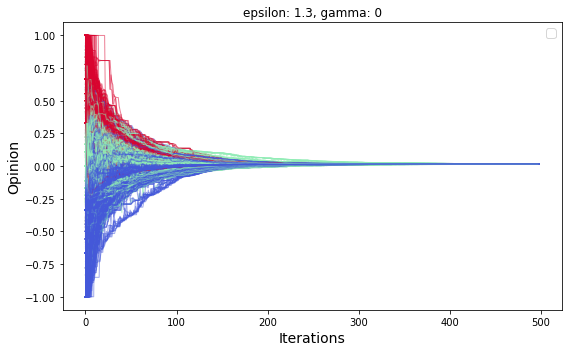

In [91]:
model = op.AlgorithmicBiasModel(G0_l)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 1.3)
config.add_model_parameter("gamma", 0)  
model.set_initial_status(G0_l, config)

# Simulation execution
iterations = model.iteration_bunch(500)

plt.figure(figsize=(8,5))
viz = OpinionEvolution(model, iterations)
viz.plot()

## Complete Graph - Real Opinion

<b>With bias</b>:  
- Gamma 0,5 con epsilon 0.65 e 1.3
- Gamma 1 con epsilon 0.65 e 1.3
- Gamma 1,5 con epsilon 0.65 e 1.3
- Gamma 5 con epsilon 0.65 e 1.3

### Gamma = 0.5 

##### Epsilon = 0.65

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [20:34<00:00, 24.69s/it]
No handles with labels found to put in legend.


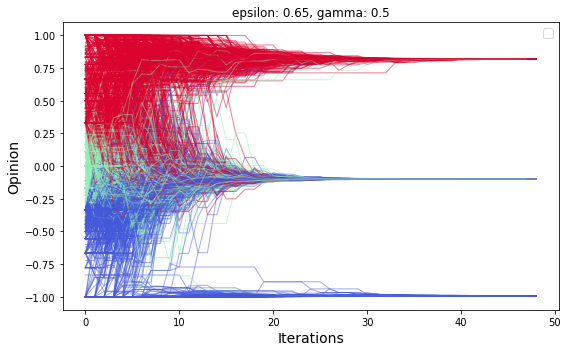

In [47]:
model = op.AlgorithmicBiasModel(H_l)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.65)
config.add_model_parameter("gamma", 0.5)  
model.set_initial_status(H_l, config)

# Simulation execution
iterations = model.iteration_bunch(50)

plt.figure(figsize=(8,5))
viz = OpinionEvolution(model, iterations)
viz.plot()

#### Epsilon = 1.3

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [10:10<00:00, 24.41s/it]
No handles with labels found to put in legend.


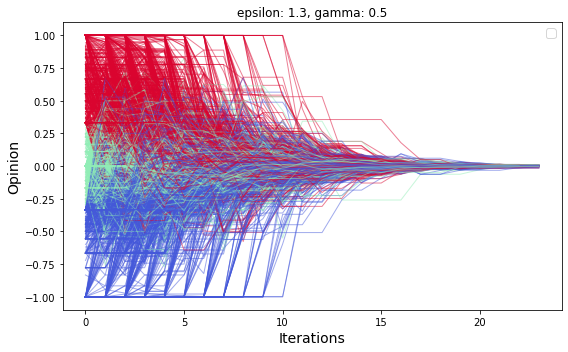

In [48]:
model = op.AlgorithmicBiasModel(H_l)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 1.3)
config.add_model_parameter("gamma", 0.5)  
model.set_initial_status(H_l, config)

# Simulation execution
iterations = model.iteration_bunch(25)

plt.figure(figsize=(8,5))
viz = OpinionEvolution(model, iterations)
viz.plot()

### Gamma = 1

##### Epsilon = 0.65

100%|██████████████████████████████████████████████████████████████████████████████| 250/250 [1:54:02<00:00, 27.37s/it]
No handles with labels found to put in legend.


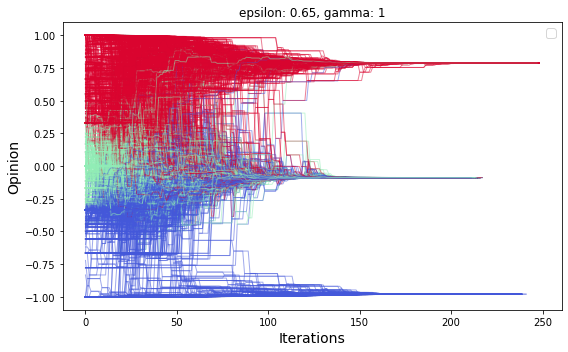

In [49]:
model = op.AlgorithmicBiasModel(H_l)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.65)
config.add_model_parameter("gamma", 1)  
model.set_initial_status(H_l, config)

# Simulation execution
iterations = model.iteration_bunch(250)

plt.figure(figsize=(8,5))
viz = OpinionEvolution(model, iterations)
viz.plot()

#### Epsilon = 1.3

100%|██████████████████████████████████████████████████████████████████████████████| 250/250 [1:58:25<00:00, 28.42s/it]
No handles with labels found to put in legend.


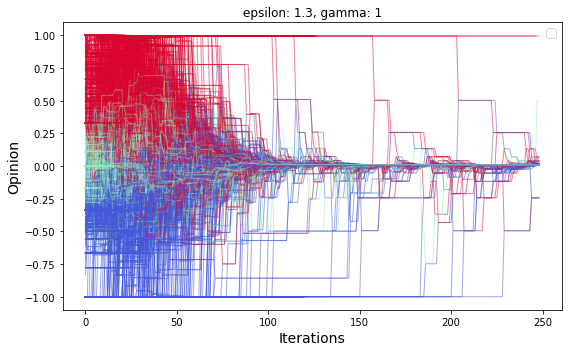

In [50]:
model = op.AlgorithmicBiasModel(H_l)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 1.3)
config.add_model_parameter("gamma", 1)  
model.set_initial_status(H_l, config)

# Simulation execution
iterations = model.iteration_bunch(250)

plt.figure(figsize=(8,5))
viz = OpinionEvolution(model, iterations)
viz.plot()

### Gamma = 1.5 

##### Epsilon = 0.65

100%|██████████████████████████████████████████████████████████████████████████████| 250/250 [1:41:06<00:00, 24.26s/it]
No handles with labels found to put in legend.


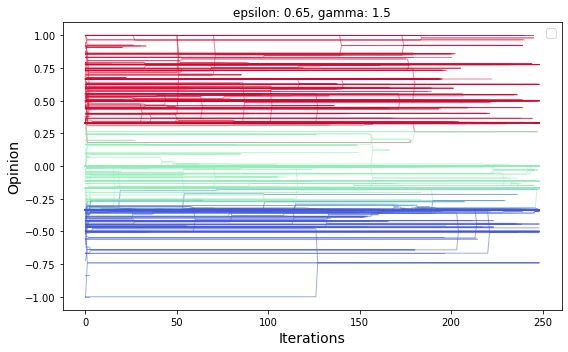

In [52]:
model = op.AlgorithmicBiasModel(H_l)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.65)
config.add_model_parameter("gamma", 1.5)  
model.set_initial_status(H_l, config)

# Simulation execution
iterations = model.iteration_bunch(250)

plt.figure(figsize=(8,5))
viz = OpinionEvolution(model, iterations)
viz.plot()

# fino a 250 (2:00:05) rimane costante la tendenza a convergere verso due opinioni: la rossa e la verde+blu  

#### Epsilon = 1.3

100%|██████████████████████████████████████████████████████████████████████████████| 250/250 [1:40:25<00:00, 24.10s/it]
No handles with labels found to put in legend.


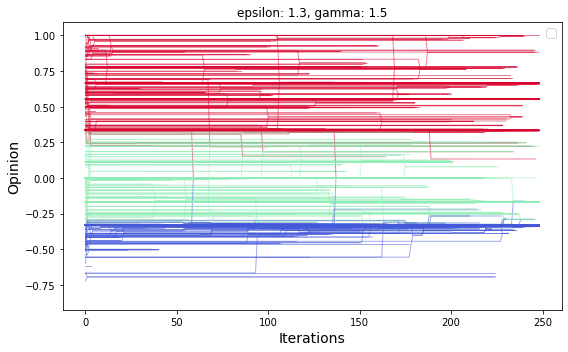

In [53]:
model = op.AlgorithmicBiasModel(H_l)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 1.3)
config.add_model_parameter("gamma", 1.5)  
model.set_initial_status(H_l, config)

# Simulation execution
iterations = model.iteration_bunch(250)

plt.figure(figsize=(8,5))
viz = OpinionEvolution(model, iterations)
viz.plot()

### Gamma = 5 

##### Epsilon = 0.65

100%|██████████████████████████████████████████████████████████████████████████████| 150/150 [1:05:08<00:00, 26.06s/it]
No handles with labels found to put in legend.


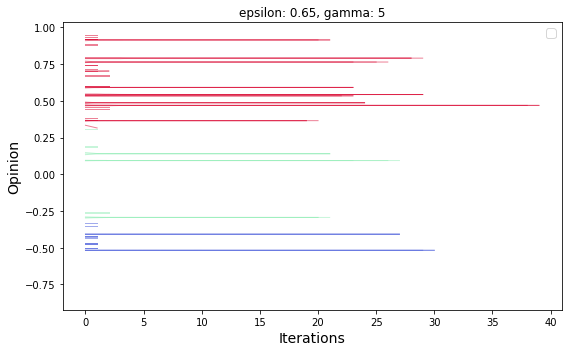

In [54]:
model = op.AlgorithmicBiasModel(H_l)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.65)
config.add_model_parameter("gamma", 5)  
model.set_initial_status(H_l, config)

# Simulation execution
iterations = model.iteration_bunch(150)

plt.figure(figsize=(8,5))
viz = OpinionEvolution(model, iterations)
viz.plot()

#### Epsilon = 1.3

100%|██████████████████████████████████████████████████████████████████████████████| 150/150 [1:05:00<00:00, 26.01s/it]
No handles with labels found to put in legend.


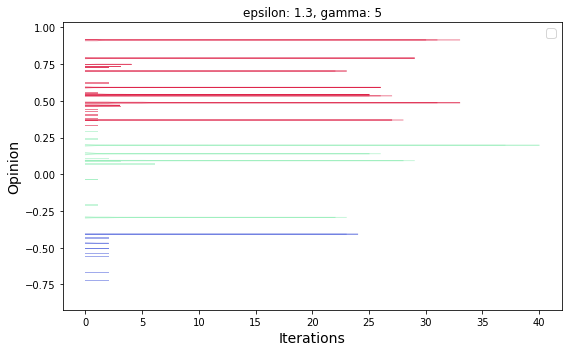

In [55]:
model = op.AlgorithmicBiasModel(H_l)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 1.3)
config.add_model_parameter("gamma", 5)  
model.set_initial_status(H_l, config)

# Simulation execution
iterations = model.iteration_bunch(150)

plt.figure(figsize=(8,5))
viz = OpinionEvolution(model, iterations)
viz.plot()

<b>W/O bias</b>:  
- con epsilon 0.65 e 1.3

### Gamma = 0

##### Epsilon = 0.65

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [20:49<00:00, 24.99s/it]
No handles with labels found to put in legend.


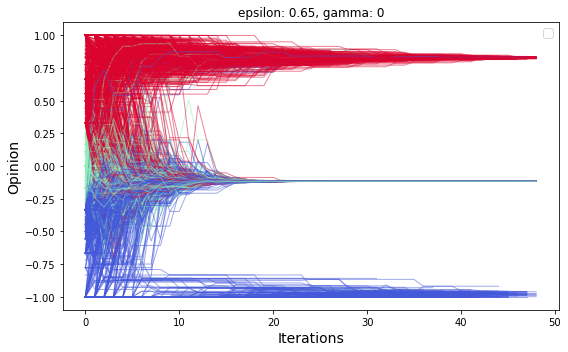

In [56]:
model = op.AlgorithmicBiasModel(H_l)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 0.65)
config.add_model_parameter("gamma", 0)  
model.set_initial_status(H_l, config)

# Simulation execution
iterations = model.iteration_bunch(50)

plt.figure(figsize=(8,5))
viz = OpinionEvolution(model, iterations)
viz.plot()

#### Epsilon = 1.3

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [12:40<00:00, 30.43s/it]
No handles with labels found to put in legend.


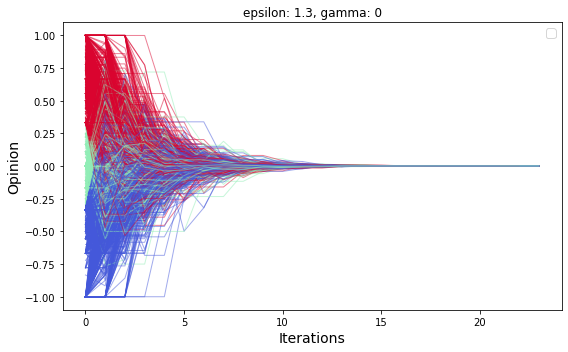

In [58]:
model = op.AlgorithmicBiasModel(H_l)

# Model configuration
config = mc.Configuration()
config.add_model_parameter("epsilon", 1.3)
config.add_model_parameter("gamma", 0)  
model.set_initial_status(H_l, config)

# Simulation execution
iterations = model.iteration_bunch(25)

plt.figure(figsize=(8,5))
viz = OpinionEvolution(model, iterations)
viz.plot()

In [ ]:
#Per separare le due "fazioni" 
#H = G.copy()
#nodesAt0 = [x for x,y in H.nodes(data=True) if y['classification']==0]
#H.remove_nodes_from(nodesAt0)
#edgesN = []
#for e in H.edges:
#    if np.sign(H.nodes[e[0]]['classification']) != np.sign(H.nodes[e[1]]['classification']):
#        edgesN.append(e)
#H.remove_edges_from(edgesN)